# TRD-653: Recognizing immediate deletions

In [1]:
%use hyper-collate(1.3.5-SNAPSHOT-10)

Welcome to HyperCollate 1.3.5-SNAPSHOT-10
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



In [2]:
val wA = HC.importXMLWitness("A", "<s>We wish you a happy Christmas!</s>")

### A regular deletion:

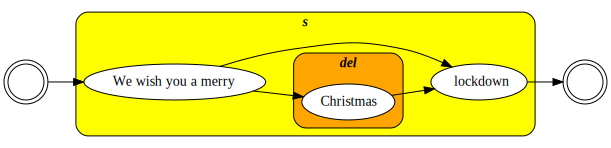

In [3]:
val wB = HC.importXMLWitness("B", """
            <s>We wish you a merry <del>Christmas</del> lockdown</s>
            """.trimMargin())
wB.show()

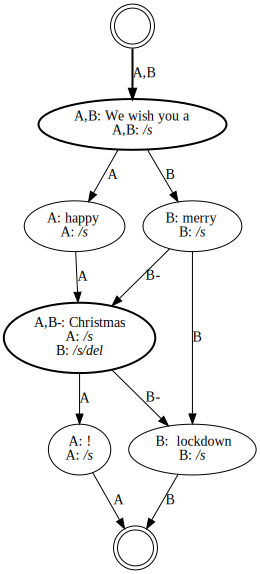

In [4]:
val cg = HC.collate(wA,wB)
cg.show()

In [5]:
cg.asHtml()

A,We wish you a,happy,Christmas,!
B,We wish you a,merry,Christmas,lockdown


In [6]:
cg.asASCIITable()

┌───┬──────────────┬──────┬─────────────┬─────────┐
│[A]│We wish you a │happy │Christmas    │!        │
├───┼──────────────┼──────┼─────────────┼─────────┤
│[B]│We wish you a │merry │[-] Christmas│lockdown │
└───┴──────────────┴──────┴─────────────┴─────────┘

## According to the TEI Guidelines, there are 3 ways to encode immediate deletions:
### 1: &lt;del seq="0"&gt;

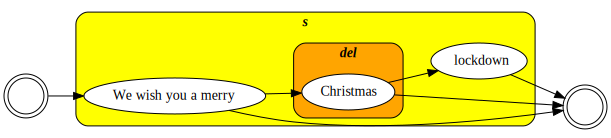

In [7]:
val wC = HC.importXMLWitness("C", """
            <s>We wish you a merry <del seq="0">Christmas</del> lockdown</s>
            """.trimMargin())
wC.show()

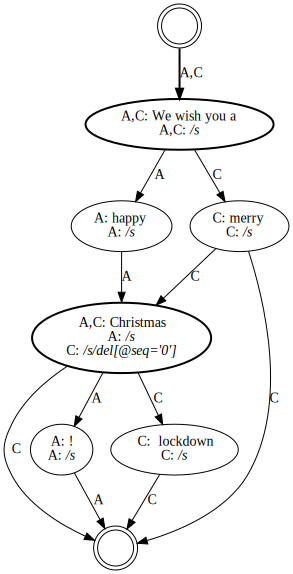

In [8]:
val cg = HC.collate(wA,wC)
cg.show()

In [9]:
cg.asHtml()

A,We wish you a,happy,Christmas !
C,We wish you a,merry,Christmas lockdown


In [10]:
cg.asASCIITable()

┌───┬──────────────┬──────┬─────────────┐
│[A]│              │      │!            │
│   │We wish you a │happy │Christmas    │
├───┼──────────────┼──────┼─────────────┤
│[C]│              │      │lockdown     │
│   │We wish you a │merry │[-] Christmas│
└───┴──────────────┴──────┴─────────────┘

### 2: &lt;del instant="true"&gt;

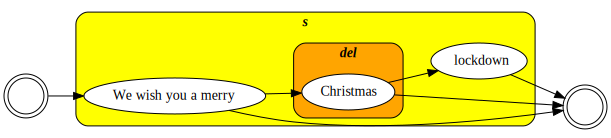

In [11]:
val wD = HC.importXMLWitness("D", """
            <s>We wish you a merry <del instant="true">Christmas</del> lockdown</s>
            """.trimMargin())
wD.show()

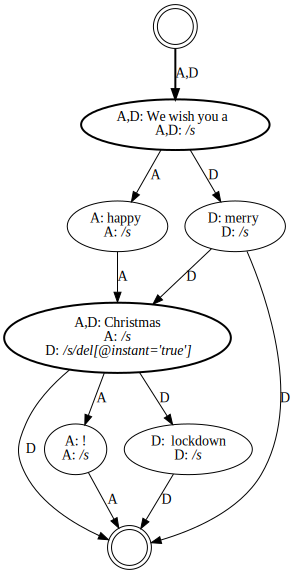

In [12]:
val cg = HC.collate(wA,wD)
cg.show()

In [13]:
cg.asHtml()

A,We wish you a,happy,Christmas !
D,We wish you a,merry,Christmas lockdown


In [14]:
cg.asASCIITable()

┌───┬──────────────┬──────┬─────────────┐
│[A]│              │      │!            │
│   │We wish you a │happy │Christmas    │
├───┼──────────────┼──────┼─────────────┤
│[D]│              │      │lockdown     │
│   │We wish you a │merry │[-] Christmas│
└───┴──────────────┴──────┴─────────────┘

### 3: &lt;del type="immediate"&gt;

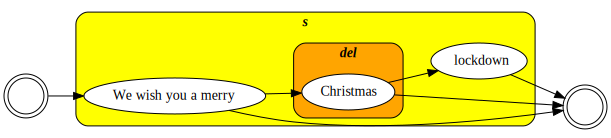

In [15]:
val wE = HC.importXMLWitness("E", """
            <s>We wish you a merry <del type="immediate">Christmas</del> lockdown</s>
            """.trimMargin())
wE.show()

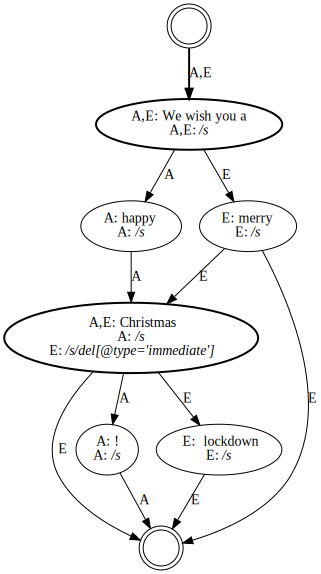

In [16]:
val cg = HC.collate(wA,wE)
cg.show()

In [17]:
cg.asHtml()

A,We wish you a,happy,Christmas !
E,We wish you a,merry,Christmas lockdown


In [18]:
cg.asASCIITable()

┌───┬──────────────┬──────┬─────────────┐
│[A]│              │      │!            │
│   │We wish you a │happy │Christmas    │
├───┼──────────────┼──────┼─────────────┤
│[E]│              │      │lockdown     │
│   │We wish you a │merry │[-] Christmas│
└───┴──────────────┴──────┴─────────────┘